#Load and Preprocess Data

In [22]:
import numpy as np
import keras
from keras import layers
from keras.layers import BatchNormalization, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 100  # CHANGED: CIFAR-100 has 100 classes
input_shape = (32, 32, 3)

# Load the CIFAR-100 data instead of CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()  #  Using CIFAR-100

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Number of classes:", num_classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Number of classes: 100


#Enhanced CNN Model Architecture

In [23]:
# ENHANCED: Improved model with more capacity for CIFAR-100
improved_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # First Conv Block - INCREASED filters for more capacity
        layers.Conv2D(64, kernel_size=(3, 3), padding='same'),  # CHANGED: 32→64 filters
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Second Conv Block - INCREASED filters
        layers.Conv2D(128, kernel_size=(3, 3), padding='same'),  # CHANGED: 64→128 filters
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Third Conv Block - INCREASED filters
        layers.Conv2D(256, kernel_size=(3, 3), padding='same'),  # CHANGED: 128→256 filters
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),  # CHANGED: Slightly higher dropout

        # Fourth Conv Block - ADDED extra block for CIFAR-100
        layers.Conv2D(512, kernel_size=(3, 3), padding='same'),  # ADDED: Extra block
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(512, kernel_size=(3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        # Dense Layers - INCREASED capacity
        layers.Flatten(),
        layers.Dense(512, activation="relu", kernel_regularizer=l2(0.001)),  # CHANGED: 256→512
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu", kernel_regularizer=l2(0.001)),  # CHANGED: 128→256
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

improved_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 8, 8, 256)      │             

 Total params: 5,902,244 (22.52 MB)

 Trainable params: 5,896,868 (22.49 MB)

 Non-trainable params: 5,376 (21.00 KB)

ADDED LAYERS: 3 convolutional blocks instead of 2

ADDED BATCH NORMALIZATION: After every Conv2D and Dense layer

ADDED ACTIVATION FUNCTIONS: Separate ReLU activations instead of combined in Conv2D

ADDED DROPOUT: After each pooling layer (0.25) and dense layers (0.5)

ADDED REGULARIZATION: L2 regularization in dense layers

INCREASED FILTERS: Progressive filter sizes (32→64→128)

ADDED PADDING: 'same' padding to preserve spatial dimensions

#Training

In [26]:
# OPTIMIZED: Using 50 epochs
batch_size = 128
epochs = 50  # CHANGED: 50 epochs instead of 100

optimizer = keras.optimizers.Adam(learning_rate=0.001)

improved_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

# Efficient callbacks for 50 epochs
callbacks = [
    keras.callbacks.EarlyStopping(
        patience=12,
        restore_best_weights=True,
        monitor='val_accuracy'
    ),
    keras.callbacks.ReduceLROnPlateau(
        factor=0.5,
        patience=8,
        min_lr=1e-7,
        monitor='val_accuracy'
    ),
]

print("Training improved model on CIFAR-100 for 50 epochs...")
history = improved_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Training improved model on CIFAR-100 for 50 epochs...
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - accuracy: 0.4181 - loss: 2.3988 - val_accuracy: 0.3924 - val_loss: 2.6243 - learning_rate: 0.0010
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.4585 - loss: 2.2320 - val_accuracy: 0.4416 - val_loss: 2.4174 - learning_rate: 0.0010
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.4805 - loss: 2.1427 - val_accuracy: 0.4080 - val_loss: 2.5625 - learning_rate: 0.0010
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5061 - loss: 2.0289 - val_accuracy: 0.4762 - val_loss: 2.2013 - learning_rate: 0.0010
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5382 - loss: 1.9275 - val_accuracy: 0.4992 - val_loss: 2.1819 - learning_rate: 0.0010
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5534 - loss: 1.8477 - val_accuracy: 0.4928 - val_loss: 2.1943 - learning_rate: 0.0010
Epoch 7/50
352/352 ━━━

INCREASED EPOCHS: From 15 to 50 for better convergence

ADDED CALLBACKS: EarlyStopping and ReduceLROnPlateau

CHANGED OPTIMIZER: Using Adam instead of basic optimizer

ADDED LEARNING RATE SCHEDULING: Automatic learning rate reduction

#Evaluate the model

In [27]:
# Evaluate the improved model
score = improved_model.evaluate(x_test, y_test, verbose=0)
print("=== IMPROVED MODEL RESULTS ON CIFAR-100 ===")
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(f"Test accuracy: {score[1]*100:.2f}%")



=== IMPROVED MODEL RESULTS ON CIFAR-100 ===
Test loss: 2.306994915008545
Test accuracy: 0.6312000155448914
Test accuracy: 63.12%


#Plot the graph

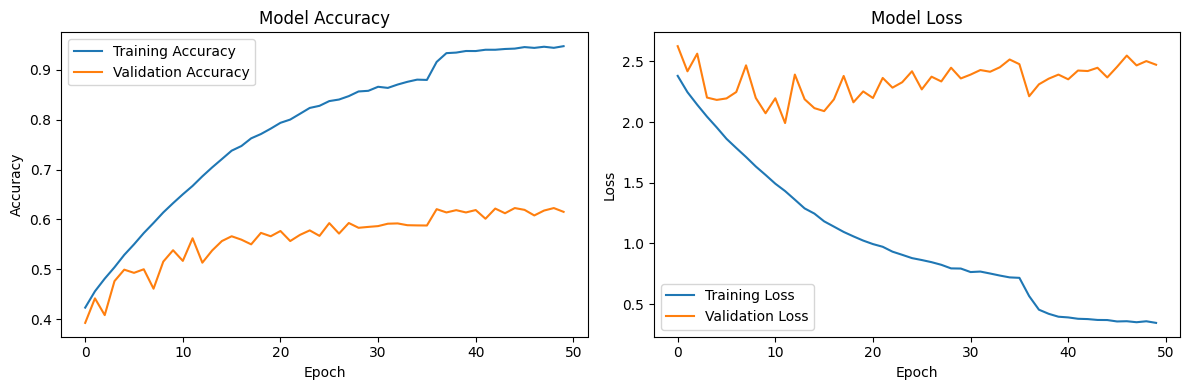

In [28]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Comparison with base model


**Building base model**

In [29]:
# For comparison, let's run the base model

# Base model (simple CNN)
base_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

base_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



##Train the base model

In [30]:
# Train base model quickly for comparison
print("Training base model for comparison...")
base_history = base_model.fit(x_train, y_train,
                             batch_size=128,
                             epochs=15,
                             validation_split=0.1,
                             verbose=1)



Training base model for comparison...
Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0646 - loss: 4.2312 - val_accuracy: 0.2022 - val_loss: 3.4548
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2105 - loss: 3.3696 - val_accuracy: 0.2538 - val_loss: 3.1789
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2642 - loss: 3.0859 - val_accuracy: 0.2944 - val_loss: 2.9822
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2932 - loss: 2.9190 - val_accuracy: 0.3062 - val_loss: 2.9075
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3214 - loss: 2.7851 - val_accuracy: 0.3234 - val_loss: 2.8187
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3420 - loss: 2.6771 - val_accuracy: 0.3420 - val_loss: 2.7212
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3575 - loss: 2.5817 - val_accuracy: 0.3508 - val_loss: 2.6755
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0

#Compare Accuracy

In [32]:
base_score = base_model.evaluate(x_test, y_test, verbose=0)

print(f"\n=== FINAL COMPARISON ===")
print(f"Base Model Accuracy:     {base_score[1]:.4f} ({base_score[1]*100:.2f}%)")
print(f"Improved Model Accuracy: {score[1]:.4f} ({score[1]*100:.2f}%)")
print(f"Accuracy Improvement:    {score[1]-base_score[1]:.4f} ({(score[1]-base_score[1])*100:.2f}%)")


=== FINAL COMPARISON ===
Base Model Accuracy:     0.4175 (41.75%)
Improved Model Accuracy: 0.6312 (63.12%)
Accuracy Improvement:    0.2137 (21.37%)
